In [8]:
import numpy as np
import os
import librosa
from scipy import fft
import matplotlib.pyplot as plt

In [9]:
ROOT_DIR = os.path.dirname(os.getcwd())
DATA_FOLDER = os.path.join(ROOT_DIR, "data")

In [19]:
audio_keparoicamL_path = os.path.join(DATA_FOLDER, "keparoicam_clipL.wav")
audio_keparoicamR_path = os.path.join(DATA_FOLDER, "keparoicam_clipR.wav")

audio_keparoicamL_sync_path = os.path.join(DATA_FOLDER, "keparoicam_clipL_synchronized.wav")
audio_keparoicamR_sync_path = os.path.join(DATA_FOLDER, "keparoicam_clipR_synchronized.wav")

audio_keparoicamL_A_path = os.path.join(DATA_FOLDER, "keparoicam_left_test_A.wav")
audio_keparoicamR_A_path = os.path.join(DATA_FOLDER, "keparoicam_right_test_A.wav")

audio_keparoicamL_B_path = os.path.join(DATA_FOLDER, "keparoicam_left_test_B.wav")
audio_keparoicamR_B_path = os.path.join(DATA_FOLDER, "keparoicam_right_test_B.wav")

audio_keparoicamL_C_path = os.path.join(DATA_FOLDER, "keparoicam_left_test_C.wav")
audio_keparoicamR_C_path = os.path.join(DATA_FOLDER, "keparoicam_right_test_C.wav")

In [20]:
target_left = audio_keparoicamL_sync_path
target_right = audio_keparoicamR_sync_path

In [21]:
def audio_fft_correlation(audio1,audio2):
    audio1_length = len(audio1)
    audio2_length = len(audio2)
    
    padsize = audio1_length+audio2_length+1
    padsize = 2**(int(np.log(padsize)/np.log(2))+1)
    
    audio1_pad = np.zeros(padsize)
    audio1_pad[:audio1_length] = audio1
    
    audio2_pad = np.zeros(padsize)
    audio2_pad[:audio2_length] = audio2
    
    corr = fft.ifft(fft.fft(audio1_pad)*np.conj(fft.fft(audio2_pad)))
    ca = np.absolute(corr)
    xmax = np.argmax(ca)
    
    return padsize, corr, ca, xmax

In [22]:
audio1, samplerate1 = librosa.load(target_left, sr=None)
audio2, samplerate2 = librosa.load(target_right, sr=None)

assert samplerate1 == samplerate2

In [23]:
audio1.shape

(7927416,)

In [24]:
padsize, corr, ca, xmax = audio_fft_correlation(audio1, audio2)

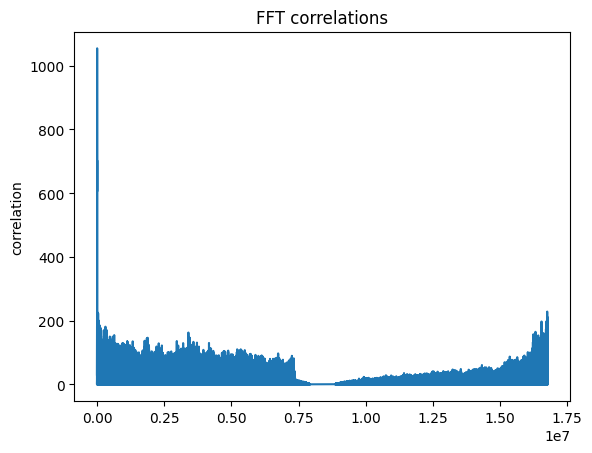

In [25]:
plt.plot(ca)
plt.title("FFT correlations")
plt.ylabel("correlation")
plt.show()

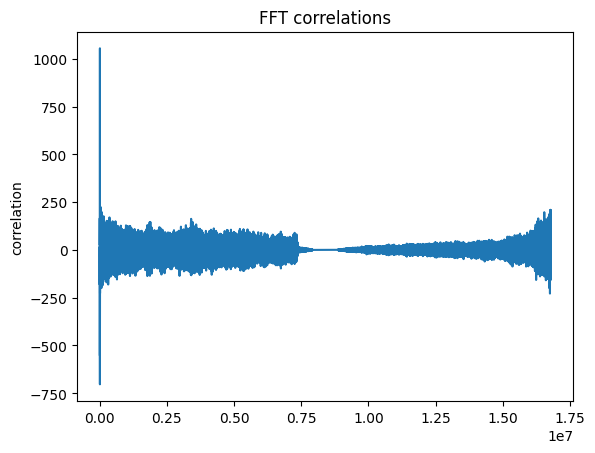

In [26]:
plt.plot(corr)
plt.title("FFT correlations")
plt.ylabel("correlation")
plt.show()

In [27]:
fs = samplerate1

if xmax > padsize // 2:
    offset = (padsize-xmax)/fs
    print(f"Audio 1 needs {offset} second delay")
else:
    offset = xmax/fs
    print(f"Audio 2 needs {offset} second delay")

Audio 2 needs 0.18299319727891156 second delay


In [28]:
-offset

-0.18299319727891156